# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Read the data

In [2]:
df=pd.read_csv(r"C:\Users\acer\OneDrive\Desktop\Suraj\DATA SCIENCE\Tabular playground Series\Online_Retail.csv",encoding='ISO-8859-1',header=0)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.shape

(541909, 8)

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data cleaning

In [7]:
# check for outliers

In [8]:
df.describe(percentiles=[.001,.01,.05,.25,.50,.75,.90,.99,.999])

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
0.1%,-96.000000,0.000000,12354.000000
1%,-2.000000,0.190000,12415.000000
5%,1.000000,0.420000,12626.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000


In [9]:
# null value
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# percentage of null value

In [11]:
round(100*(df.isnull().sum()/len(df.index)),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [12]:
# drop rows having missing values
df=df.dropna()

In [13]:
round(100*(df.isnull().sum()/len(df)))

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [14]:
df.shape

(406829, 8)

In [15]:
# changing the datatype of customerID as per business understanding 

In [16]:
df['CustomerID']=df['CustomerID'].astype(str)

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


# Data Preparation

In [19]:
df['Amount']=df['Quantity']*df['UnitPrice']

In [20]:
group_df=df.groupby('CustomerID')['Amount'].sum()

In [21]:
group_df.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64

In [22]:
group_df=group_df.reset_index()

In [23]:
group_df.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [24]:
# recency

In [25]:
grouping_df=df.groupby('CustomerID')['InvoiceNo'].count()

In [26]:
grouping_df=grouping_df.reset_index()

In [27]:
grouping_df.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [28]:
grouping_df.columns=['CustomerID','Frequency']

In [29]:
grouping_df.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [30]:
grouped=pd.merge(group_df,grouping_df,on='CustomerID',how='inner')

In [31]:
grouped.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [32]:
# recency

In [33]:
# convert datetime to proper datatype 

In [34]:
import datetime as dt

In [35]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [36]:
# compute the max date to know the last transaction date

In [37]:
max_date=max(df['InvoiceDate'])

In [38]:
max_date

Timestamp('2011-12-09 12:50:00')

In [39]:
#compute diff between max date and transaction date

In [40]:
df['diff']=max_date-df['InvoiceDate']

In [41]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [42]:
# compute last transaction date to see the recency of the customer

In [43]:
grouped_time=df.groupby('CustomerID')['diff'].min()

In [44]:
grouped_time=grouped_time.reset_index()

In [45]:
grouped_time.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [46]:
grouped_time.columns=['CustomerID','Recency']

In [47]:
grouped_time

,CustomerID,Recency
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


In [48]:
# Extract number of days only

In [49]:
grouped_time['Recency']=grouped_time['Recency'].dt.days

In [50]:
grouped_time.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [51]:
# merge the data

In [52]:
group=pd.merge(grouped,grouped_time,on='CustomerID',how='inner')

In [53]:
group.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [54]:
# outliers analysis of amount frequency and recency

Text(0.5, 1.0, 'Outliers variable Distribution')

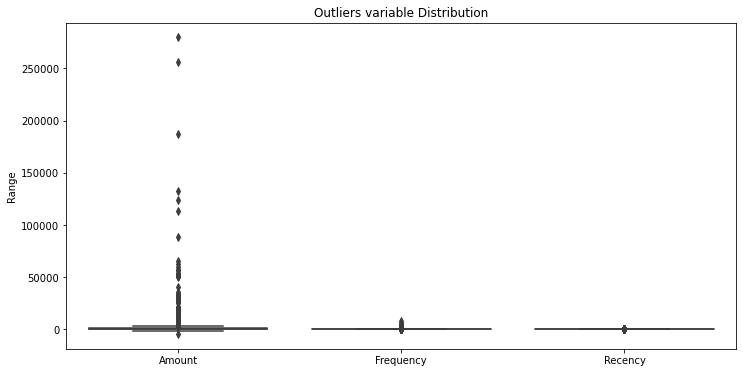

In [55]:
attributes=['Amount','Frequency','Recency']
plt.figure(figsize=(12,6))
sns.boxplot(data=group[attributes],orient='V')
plt.ylabel('Range')
plt.title('Outliers variable Distribution')

In [56]:
# Removing outliers for amount

In [57]:
Q1=group['Amount'].quantile(0.05)
Q3=group['Amount'].quantile(0.95)
IQR=Q3-Q1
group=group[(group.Amount>=Q1-1.5*IQR)&(group.Amount<=Q3+1.5*IQR)]

In [58]:
# removing outliers for frequency

In [59]:
Q1=group['Frequency'].quantile(0.05)
Q3=group['Frequency'].quantile(0.95)
IQR=Q3-Q1
group=group[(group.Frequency>=Q1-1.5*IQR)&(group.Frequency<=Q3+1.5*IQR)]

In [60]:
# removing outliers for recency

In [61]:
Q1=group['Recency'].quantile(0.05)
Q3=group['Recency'].quantile(0.95)
IQR=Q3-Q1
group=group[(group.Recency>=Q1-1.5*IQR)&(group.Recency<=Q3+1.5*IQR)]

In [62]:
# rescaling

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
# Instantiate the object

In [65]:
scaler=StandardScaler()

In [66]:
group_df=group[['Amount','Frequency','Recency']]

In [67]:
group_df_scaled=scaler.fit_transform(group_df)

In [68]:
group_df_scaled.shape

(4293, 3)

In [69]:
group_df_scaled=pd.DataFrame(group_df_scaled)

In [70]:
group_df_scaled.columns=['Amount','Frequency','Recency']

In [71]:
group_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


# Build the Model

In [72]:
from sklearn.cluster import KMeans

In [73]:
# kMeans with arbitrary K

In [74]:
kmeans=KMeans(n_clusters=4,max_iter=50)

In [75]:
kmeans.fit(group_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [76]:
kmeans.labels_

array([2, 3, 0, ..., 2, 0, 0])

In [77]:
ssd=[]
range_num_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_num_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(group_df_scaled)
    ssd.append(kmeans.inertia_)

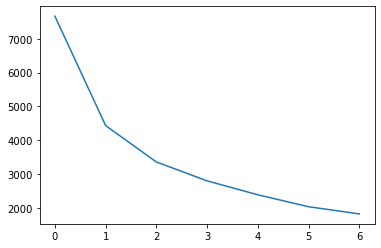

In [78]:
plt.plot(ssd)

In [79]:
# silhouette analysis

In [80]:
range_num_clusters=range(2,8)
for num_clusters in range_num_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(group_df_scaled)
    cluster_labels=kmeans.labels_

In [81]:
from sklearn.metrics import silhouette_score

In [82]:
silhouette_avg=silhouette_score(group_df_scaled,cluster_labels)

In [83]:
silhouette_avg

0.41733152354849085

In [84]:
print('For num_clusters={0}, the silhouette_score is {1}'.format(num_clusters,silhouette_avg))

For num_clusters=7, the silhouette_score is 0.41733152354849085


In [85]:
# final model with k=7

In [86]:
kmeans=KMeans(n_clusters=7,max_iter=50)

In [87]:
kmeans.fit(group_df_scaled)

KMeans(max_iter=50, n_clusters=7)

In [88]:
kmeans.labels_

array([3, 4, 5, ..., 1, 5, 0])

In [89]:
# assign the labels

In [90]:
group['cluster_ID']=kmeans.labels_

In [91]:
group.head()

,CustomerID,Amount,Frequency,Recency,cluster_ID
0,12346.0,0.00,2,325,3
1,12347.0,4310.00,182,1,4
2,12348.0,1797.24,31,74,5
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,3


In [92]:
group

,CustomerID,Amount,Frequency,Recency,cluster_ID
0,12346.0,0.00,2,325,3
1,12347.0,4310.00,182,1,4
2,12348.0,1797.24,31,74,5
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,3
...,...,...,...,...,...
4366,18278.0,173.90,9,73,5
4367,18280.0,180.60,10,277,3
4368,18281.0,80.82,7,180,1
4369,18282.0,176.60,13,7,5


In [93]:
# visualize clusterID vs Amount

<AxesSubplot:xlabel='cluster_ID', ylabel='Amount'>

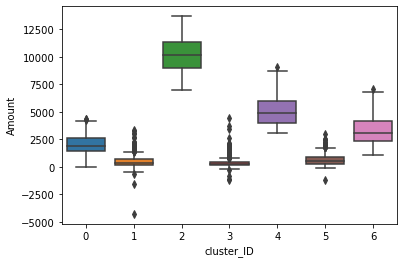

In [94]:
sns.boxplot(x='cluster_ID',y='Amount',data=group)

In [95]:
# vislualize frequency vs clusterID

<AxesSubplot:xlabel='cluster_ID', ylabel='Frequency'>

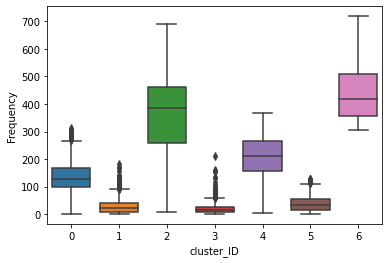

In [96]:
sns.boxplot(x='cluster_ID',y='Frequency',data=group)

<AxesSubplot:xlabel='cluster_ID', ylabel='Recency'>

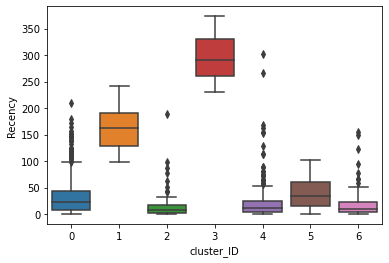

In [97]:
sns.boxplot(x='cluster_ID',y='Recency',data=group)

In [98]:
# Hierarchial Clustering

In [99]:
from scipy.cluster.hierarchy import linkage

In [100]:
from scipy.cluster.hierarchy import dendrogram

In [101]:
from scipy.cluster.hierarchy import cut_tree

In [102]:
# single linkage

In [103]:
mergings=linkage(group_df_scaled,method='single',metric='euclidean')

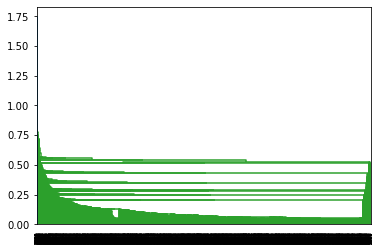

In [104]:
dendrogram(mergings)
plt.show()

In [105]:
# complete linkage

In [106]:
mergings=linkage(group_df_scaled,method='complete',metric='euclidean')

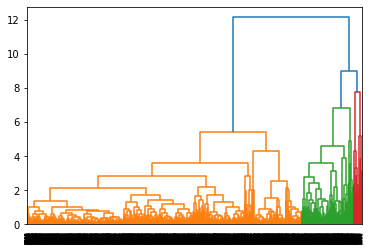

In [107]:
dendrogram(mergings)
plt.show()

In [108]:
# average linkage

In [109]:
mergings=linkage(group_df_scaled,method='average',metric='euclidean')

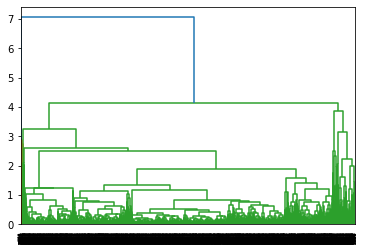

In [110]:
dendrogram(mergings)
plt.show()

In [111]:
# cut the dendrogram based on k

In [112]:
cluster_labels=cut_tree(mergings,n_clusters=3).reshape(-1,)

In [113]:
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
# assign cluster labels

In [115]:
group['cluster_label']=cluster_labels

In [116]:
group

,CustomerID,Amount,Frequency,Recency,cluster_ID,cluster_label
0,12346.0,0.00,2,325,3,0
1,12347.0,4310.00,182,1,4,0
2,12348.0,1797.24,31,74,5,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,3,0
...,...,...,...,...,...,...
4366,18278.0,173.90,9,73,5,0
4367,18280.0,180.60,10,277,3,0
4368,18281.0,80.82,7,180,1,0
4369,18282.0,176.60,13,7,5,0


In [117]:
# visualize cluster labels vs Amount,frequency and recency

<AxesSubplot:xlabel='cluster_label', ylabel='Amount'>

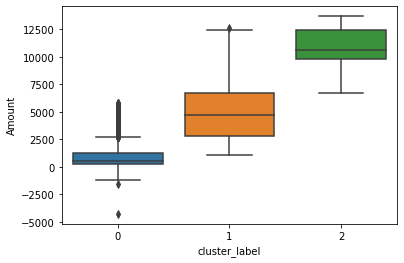

In [119]:
sns.boxplot(x='cluster_label',y='Amount',data=group)

<AxesSubplot:xlabel='cluster_label', ylabel='Frequency'>

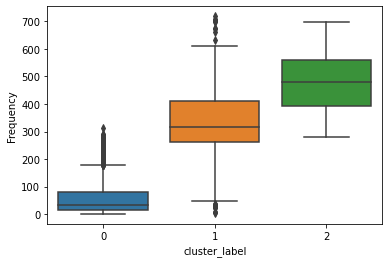

In [120]:
sns.boxplot(x='cluster_label',y='Frequency',data=group)

<AxesSubplot:xlabel='cluster_label', ylabel='Recency'>

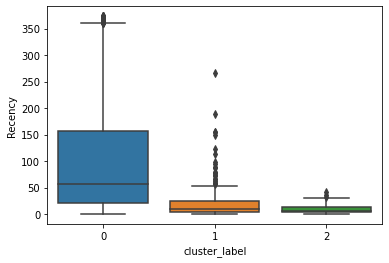

In [121]:
sns.boxplot(x='cluster_label',y='Recency',data=group)